In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("bank.csv")

In [3]:
df.head(10)

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
0,1,227,147,111,2460,639
1,2,123,86,65,3510,436
2,3,306,149,76,2570,669
3,4,251,112,129,3650,623
4,5,174,135,128,3400,579
5,6,200,229,57,3470,625
6,7,144,88,112,3190,476
7,8,256,165,46,2930,621
8,9,282,139,105,2110,658
9,10,317,196,72,3000,717


In [4]:
df.shape

(515, 6)

In [5]:
df.describe


<bound method NDFrame.describe of      Bank   DD  Withdrawals  Deposits  Branch Area in sqft  avg daily walkins
0       1  227          147       111                 2460                639
1       2  123           86        65                 3510                436
2       3  306          149        76                 2570                669
3       4  251          112       129                 3650                623
4       5  174          135       128                 3400                579
..    ...  ...          ...       ...                  ...                ...
510   511  337          140       111                 2640                694
511   512  168          131        60                 2640                524
512   513  333           86       108                 2850                676
513   514  192          176        34                 2760                505
514   515  331          186        97                 2700                767

[515 rows x 6 columns]>

In [6]:
df.isnull().sum()

Bank                   0
DD                     0
Withdrawals            0
Deposits               0
Branch Area in sqft    0
avg daily walkins      0
dtype: int64

In [7]:
from sklearn.cluster import KMeans

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Bank                 515 non-null    int64
 1   DD                   515 non-null    int64
 2   Withdrawals          515 non-null    int64
 3   Deposits             515 non-null    int64
 4   Branch Area in sqft  515 non-null    int64
 5   avg daily walkins    515 non-null    int64
dtypes: int64(6)
memory usage: 24.3 KB


In [9]:
df.duplicated().sum()

0

In [10]:
df.dtypes

Bank                   int64
DD                     int64
Withdrawals            int64
Deposits               int64
Branch Area in sqft    int64
avg daily walkins      int64
dtype: object

In [11]:
data_df = df.drop(["Bank"], axis = 1)

In [12]:
data_df

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
0,227,147,111,2460,639
1,123,86,65,3510,436
2,306,149,76,2570,669
3,251,112,129,3650,623
4,174,135,128,3400,579
...,...,...,...,...,...
510,337,140,111,2640,694
511,168,131,60,2640,524
512,333,86,108,2850,676
513,192,176,34,2760,505


In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
X = StandardScaler()

In [15]:
scaled_df = X.fit_transform(data_df)

In [16]:
scaled_df

array([[-0.07888413, -0.06497257,  1.02602411, -1.08710095,  0.48432644],
       [-1.64081915, -1.13811308, -0.58410514,  1.31763546, -1.949528  ],
       [ 1.10758573, -0.02978763, -0.19907423, -0.83517619,  0.84400936],
       ...,
       [ 1.51308809, -1.13811308,  0.92101568, -0.19391314,  0.92793538],
       [-0.60453534,  0.44520899, -1.66919225, -0.40003341, -1.12225728],
       [ 1.48305088,  0.62113366,  0.53598477, -0.53744692,  2.01897357]])

In [17]:
k_means = KMeans(n_clusters=2, n_init = "auto")

In [18]:
k_means.fit(scaled_df)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=2, n_init='auto')

In [19]:
k_means.labels_

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,

In [20]:
k_means.inertia_

1944.4649697874029

In [21]:
k_means = KMeans(n_clusters=3, n_init="auto")
k_means.fit(scaled_df)
k_means.inertia_

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


1595.2922679736773

In [22]:
k_means = KMeans(n_clusters=4, n_init="auto")
k_means.fit(scaled_df)
k_means.inertia_

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


1379.1369042936756

In [23]:
k_means = KMeans(n_clusters=5, n_init="auto")
k_means.fit(scaled_df)
k_means.inertia_

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


1249.6886111764518

In [24]:
k_means = KMeans(n_clusters=1, n_init="auto")
k_means.fit(scaled_df)
k_means.inertia_

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


2575.0

In [25]:
wss = []

In [26]:
for i in range(1,11):
    KM = KMeans(n_clusters = i, n_init = "auto", random_state = 1)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

In [27]:
wss

[2575.0,
 1943.9650646082403,
 1594.269645855651,
 1375.5264541522715,
 1267.9553784879465,
 1121.3253239659089,
 1031.2940171185269,
 957.5717148570401,
 913.098740918348,
 842.5888655184295]

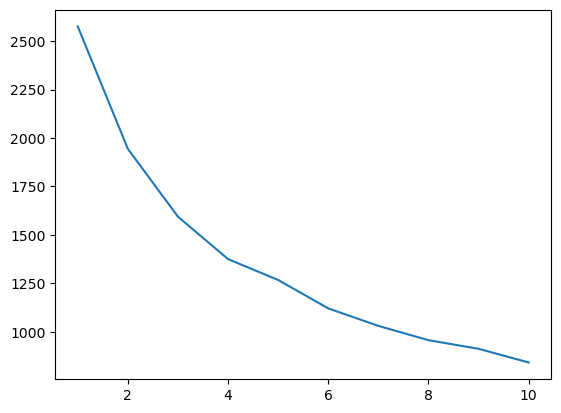

In [28]:
plt.plot(range(1,11), wss);

In [29]:
k_means = KMeans(n_clusters=4, n_init = "auto")
k_means.fit(scaled_df)
labels = k_means.labels_

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [30]:
df["clus_Kmeans"] = labels
df.head(10)

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins,clus_Kmeans
0,1,227,147,111,2460,639,2
1,2,123,86,65,3510,436,0
2,3,306,149,76,2570,669,2
3,4,251,112,129,3650,623,1
4,5,174,135,128,3400,579,0
5,6,200,229,57,3470,625,2
6,7,144,88,112,3190,476,0
7,8,256,165,46,2930,621,3
8,9,282,139,105,2110,658,2
9,10,317,196,72,3000,717,2


In [31]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [32]:
silhouette_score(scaled_df, labels)

0.1894921464588169

In [33]:
sil_width = silhouette_samples(scaled_df, labels)

In [34]:
k_means=KMeans(n_clusters=4, random_state = 1, n_init = "auto")
k_means.fit(scaled_df)
labels = k_means.labels_

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [35]:
silhouette_score(scaled_df, labels)

0.22762879486901233

In [36]:
silh_width = silhouette_samples(scaled_df, labels) 

In [37]:
df["silhouette_width"] = silh_width
df.head(10)

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins,clus_Kmeans,silhouette_width
0,1,227,147,111,2460,639,2,0.189675
1,2,123,86,65,3510,436,0,0.252998
2,3,306,149,76,2570,669,2,0.117628
3,4,251,112,129,3650,623,1,0.129438
4,5,174,135,128,3400,579,0,0.100075
5,6,200,229,57,3470,625,2,0.321617
6,7,144,88,112,3190,476,0,0.408802
7,8,256,165,46,2930,621,3,0.078659
8,9,282,139,105,2110,658,2,0.263779
9,10,317,196,72,3000,717,2,0.206623


## Cluster Profiling
## data_df.Clus_kmeans4.value_counts().sort_index()
## clust_profile=data_df.drop(['Bank'],axis=1)
## clust_profile=clust_profile.groupby('Clus_kmeans4').mean()
## clust_profile['freq']=data_df.Clus_kmeans4.value_counts().sort_index()
## clust_profile

In [38]:
df.clus_Kmeans.value_counts().sort_index()

0    132
1    131
2    161
3     91
Name: clus_Kmeans, dtype: int64

In [39]:
clust_profile = df.drop(["Bank"], axis = 1)


In [40]:
clust_profile = clust_profile.groupby("clus_Kmeans").mean()

In [41]:
clust_profile["freq"] = df.clus_Kmeans.value_counts().sort_index()

In [42]:
clust_profile

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins,silhouette_width,freq
clus_Kmeans,,,,,,,
0,155.742424,129.378788,81.621212,3119.545455,504.484848,0.232039,132
1,290.305344,98.732824,88.587786,3109.083969,608.450382,0.249514,131
2,245.291925,205.472050,92.049689,2815.279503,676.745342,0.227797,161
3,236.593407,159.494505,53.516484,2626.648352,582.703297,0.189430,91
